# 2293815

# **Transforming the .txt file to .csv file**

In [ ]:
from google.colab import files
import pandas as pd


#Read the file into a DataFrame
file_name = "imdb_labelled.txt"
df = pd.read_csv(file_name, sep='\t', header=None, names=['Review', 'Sentiment'])

#Save as CSV
csv_file_name = "imdb_labelled.csv"
df.to_csv(csv_file_name, index=False)

# Download the CSV file to your local machine (optional)
files.download(csv_file_name)

# Display the first few rows to confirm
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'imdb_labelled.txt'

# **Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#nltk.download()
#nltk.download('punkt')

In [ ]:
reviews = pd.read_csv("imdb_labelled.csv")
reviews.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [ ]:
reviews.shape

(748, 2)

In [ ]:
reviews['Sentiment'].value_counts()

,count
Sentiment,
1,386
0,362


In [ ]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:100])
print(reviews['Sentiment'][:100])

[0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
0     0
1     0
2     0
3     0
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: Sentiment, Length: 100, dtype: int64


In [ ]:
#change the text column datatype to string
reviews = reviews.astype({'Review':'string'})

In [ ]:
#get the review text for preprocessing
text = reviews['Review']
text[:5]

,Review
0,"A very, very, very slow-moving, aimless movie ..."
1,Not sure who was more lost - the flat characte...
2,Attempting artiness with black & white and cle...
3,Very little music or anything to speak of.
4,The best scene in the movie was when Gerardo i...


In [ ]:
import string

text1 = []  # Initialize an empty list for cleaned reviews

for review in text:
    # Convert to lowercase, remove punctuation, and remove numbers
    review = review.lower()  # Lowercasing
    review = review.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    review = review.translate(str.maketrans('', '', string.digits))  # Remove numbers
    text1.append(review)

print(text1[:25])



['a very very very slowmoving aimless movie about a distressed drifting young man  ', 'not sure who was more lost  the flat characters or the audience nearly half of whom walked out  ', 'attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  ', 'very little music or anything to speak of  ', 'the best scene in the movie was when gerardo is trying to find a song that keeps running through his head  ', 'the rest of the movie lacks art charm meaning if its about emptiness it works i guess because its empty  ', 'wasted two hours  ', 'saw the movie today and thought it was a good effort good messages for kids  ', 'a bit predictable  ', 'loved the casting of jimmy buffet as the science teacher  ', 'and those baby owls were adorable  ', 'the movie showed a lot of florida at its best made it look very appealing  ', 'the songs were the best and the muppets were so hilari

In [ ]:
text1 = pd.Series(text1)
text1[:25]

,0
0,a very very very slowmoving aimless movie abou...
1,not sure who was more lost the flat character...
2,attempting artiness with black white and clev...
3,very little music or anything to speak of
4,the best scene in the movie was when gerardo i...
5,the rest of the movie lacks art charm meaning ...
6,wasted two hours
7,saw the movie today and thought it was a good ...
8,a bit predictable
9,loved the casting of jimmy buffet as the scien...


In [ ]:
#remove stop words
import nltk
nltk.download('stopwords')
#Setting English stopwords
stop_words = set(stopwords.words('english'))

text1 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
text1[:25]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0
0,slowmoving aimless movie distressed drifting y...
1,sure lost flat characters audience nearly half...
2,attempting artiness black white clever camera ...
3,little music anything speak
4,best scene movie gerardo trying find song keep...
5,rest movie lacks art charm meaning emptiness w...
6,wasted two hours
7,saw movie today thought good effort good messa...
8,bit predictable
9,loved casting jimmy buffet science teacher


In [ ]:
import re

# Function to preprocess text further
def preprocess_text(review):
    # Step 1: Remove special characters 18
    review = re.sub(r"[^A-Za-z0-9\s]", "", review)
    # Step 2: Remove short words (e.g., words with 1 letter)
    review = " ".join([word for word in review.split() if len(word) > 1])
    # Step 3: Remove extra spaces
    review = re.sub(r"\s+", " ", review).strip()
    return review

# Apply the new preprocessing step on the already preprocessed text (text1)
text1 = text1.apply(preprocess_text)

# Display the first 25 processed entries
print(text1[:25])


0     slowmoving aimless movie distressed drifting y...
1     sure lost flat characters audience nearly half...
2     attempting artiness black white clever camera ...
3                           little music anything speak
4     best scene movie gerardo trying find song keep...
5     rest movie lacks art charm meaning emptiness w...
6                                      wasted two hours
7     saw movie today thought good effort good messa...
8                                       bit predictable
9            loved casting jimmy buffet science teacher
10                                   baby owls adorable
11    movie showed lot florida best made look appealing
12                         songs best muppets hilarious
13                                                 cool
14    right case movie delivers everything almost ri...
15    average acting main person low budget clearly see
16    review long overdue since consider tale two si...
17    ill put gem movie terms screenplay cinemat

In [ ]:
text1[117]

'script script'

In [ ]:
text1[121]

'ill even say torture'

In [ ]:
text1[18]

'practically perfect true masterpiece sea faux masterpieces'

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

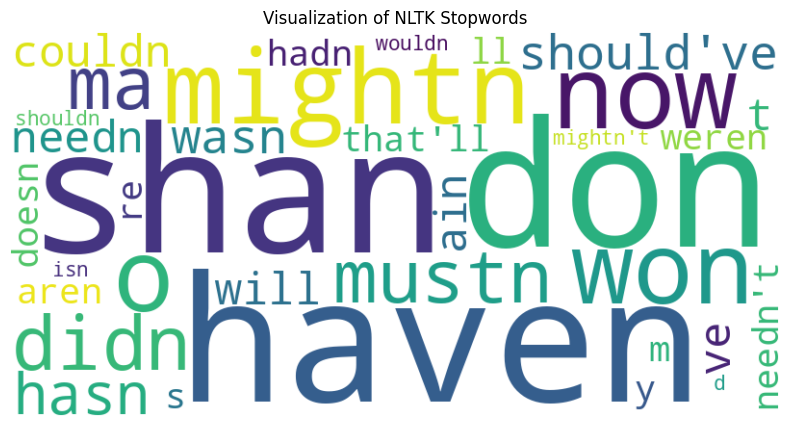

In [ ]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(stop_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualization of NLTK Stopwords")
plt.show()


In [ ]:
#apply lemmatising with POS tags
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import wordnet
text1 = pd.Series(text1)
def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text3 = text1.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text3[:25]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,0
0,slowmoving aimless movie distressed drift youn...
1,sure lose flat character audience nearly half ...
2,attempt artiness black white clever camera ang...
3,little music anything speak
4,best scene movie gerardo try find song keep ru...
5,rest movie lack art charm meaning emptiness wo...
6,waste two hour
7,saw movie today thought good effort good messa...
8,bit predictable
9,love cast jimmy buffet science teacher


In [ ]:
reviews1 = list(zip(text3, label))

reviewsP = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])
reviewsP

,Review,Sentiment
0,slowmoving aimless movie distressed drift youn...,0
1,sure lose flat character audience nearly half ...,0
2,attempt artiness black white clever camera ang...,0
3,little music anything speak,0
4,best scene movie gerardo try find song keep ru...,1
...,...,...
743,get bore watch jessice lange take clothes,0
744,unfortunately virtue film production work lose...,0
745,word embarrass,0
746,exceptionally bad,0


# **BoW**

In [ ]:
import numpy as np
import pandas as pd
import nltk
import string
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
reviewsP1 = reviewsP.sample(frac=1, random_state=1).reset_index()
reviewsP1.head()

,index,Review,Sentiment
0,265,premise film ridiculous president u,0
1,519,find well movie youtube,0
2,584,saw child tv back stranger love,1
3,717,time seem film animation dominate disneypixars...,1
4,90,also real treat see anthony quinn play crazy h...,1


In [ ]:
#split the dataset

#train dataset by splitting the data
train_reviews = reviewsP1.Review[:500]
train_sentiments = reviewsP1.Sentiment[:500]

#test dataset
test_reviews = reviewsP1.Review[500:]
test_sentiments = reviewsP1.Sentiment[500:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(500,) (500,)
(248,) (248,)


In [ ]:
train_reviews[0]

'premise film ridiculous president u'

In [ ]:
#Count vectorizer for bag of words
#cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv=CountVectorizer()

#transformed train reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

#vocab=cv.get_feature_names_out() #toget feature names

BOW_cv_train: (500, 1839)
BOW_cv_test: (248, 1839)


In [ ]:
print(cv_train_reviews[0])

  (0, 1233)	1
  (0, 601)	1
  (0, 1339)	1
  (0, 1236)	1


In [ ]:
print(train_sentiments)
print(test_sentiments)

0      0
1      0
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    0
499    1
Name: Sentiment, Length: 500, dtype: int64
500    1
501    1
502    1
503    0
504    0
      ..
743    1
744    1
745    0
746    0
747    1
Name: Sentiment, Length: 248, dtype: int64


# **Classification**

## Naive Bayes

In [ ]:
############################################
###             Naive Bayes              ###
############################################

NB = MultinomialNB()

#Fitting the model for Bag of words
NB_bow = NB.fit(cv_train_reviews,train_sentiments)



#Predicting the model for bag of words
NB_bow_predict = NB.predict(cv_test_reviews)



#Accuracy score for bag of words
NB_bow_score=accuracy_score(test_sentiments,NB_bow_predict)
print("NB_bow accuracy :",NB_bow_score)



#Classification report for bag of words
NB_bow_report=classification_report(test_sentiments,NB_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,NB_bow_predict), '\n')
print(NB_bow_report)







NB_bow accuracy : 0.7419354838709677
[[87 43]
 [21 97]] 

              precision    recall  f1-score   support

    Positive       0.81      0.67      0.73       130
    Negative       0.69      0.82      0.75       118

    accuracy                           0.74       248
   macro avg       0.75      0.75      0.74       248
weighted avg       0.75      0.74      0.74       248



## SVM

In [ ]:
############################################
###                  SVM                 ###
############################################
#linear SVM
SVM = SGDClassifier(loss='hinge',max_iter=500,random_state=42)

#Fitting the model for Bag of words
SVM_bow = SVM.fit(cv_train_reviews,train_sentiments)



#Predicting the model for bag of words
SVM_bow_predict = SVM.predict(cv_test_reviews)



#Accuracy score for bag of words
SVM_bow_score=accuracy_score(test_sentiments,SVM_bow_predict)
print("SVM_bow accuracy :",SVM_bow_score)



#Classification report for bag of words
SVM_bow_report=classification_report(test_sentiments,SVM_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,SVM_bow_predict), '\n')
print(SVM_bow_report)



SVM_bow accuracy : 0.7338709677419355
[[ 82  48]
 [ 18 100]] 

              precision    recall  f1-score   support

    Positive       0.82      0.63      0.71       130
    Negative       0.68      0.85      0.75       118

    accuracy                           0.73       248
   macro avg       0.75      0.74      0.73       248
weighted avg       0.75      0.73      0.73       248



## KNN

In [ ]:
############################################
###                  k-NN                ###
############################################

kNN = KNeighborsClassifier(n_neighbors=7)

#Fitting the model for Bag of words
kNN_bow = kNN.fit(cv_train_reviews,train_sentiments)



#Predicting the model for bag of words
kNN_bow_predict = kNN.predict(cv_test_reviews)



#Accuracy score for bag of words
kNN_bow_score=accuracy_score(test_sentiments,kNN_bow_predict)
print("kNN_bow accuracy :",kNN_bow_score)



#Classification report for bag of words
kNN_bow_report=classification_report(test_sentiments,kNN_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,kNN_bow_predict), '\n')
print(kNN_bow_report)



kNN_bow accuracy : 0.625
[[99 31]
 [62 56]] 

              precision    recall  f1-score   support

    Positive       0.61      0.76      0.68       130
    Negative       0.64      0.47      0.55       118

    accuracy                           0.62       248
   macro avg       0.63      0.62      0.61       248
weighted avg       0.63      0.62      0.62       248



## XGBoost

In [ ]:
############################################
###              XGBoost                ###
############################################

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees
    max_depth=6,       # Maximum depth of the tree
    learning_rate=0.1, # Learning rate
    use_label_encoder=False,  # Disable encoding warnings
    eval_metric="logloss"     # Evaluation metric for binary classification
)

# Fitting the model for Bag of Words
xgb_bow = xgb_clf.fit(cv_train_reviews, train_sentiments)

# Predicting the model for Bag of Words
xgb_bow_predict = xgb_bow.predict(cv_test_reviews)

# Accuracy score for Bag of Words
xgb_bow_score = accuracy_score(test_sentiments, xgb_bow_predict)
print("XGBoost accuracy (BoW):", xgb_bow_score)

# Classification report for Bag of Words
xgb_bow_report = classification_report(test_sentiments, xgb_bow_predict, target_names=['Positive', 'Negative'])
print(confusion_matrix(test_sentiments, xgb_bow_predict), '\n')
print(xgb_bow_report)


XGBoost accuracy (BoW): 0.6693548387096774
[[ 63  67]
 [ 15 103]] 

              precision    recall  f1-score   support

    Positive       0.81      0.48      0.61       130
    Negative       0.61      0.87      0.72       118

    accuracy                           0.67       248
   macro avg       0.71      0.68      0.66       248
weighted avg       0.71      0.67      0.66       248



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Compare Models


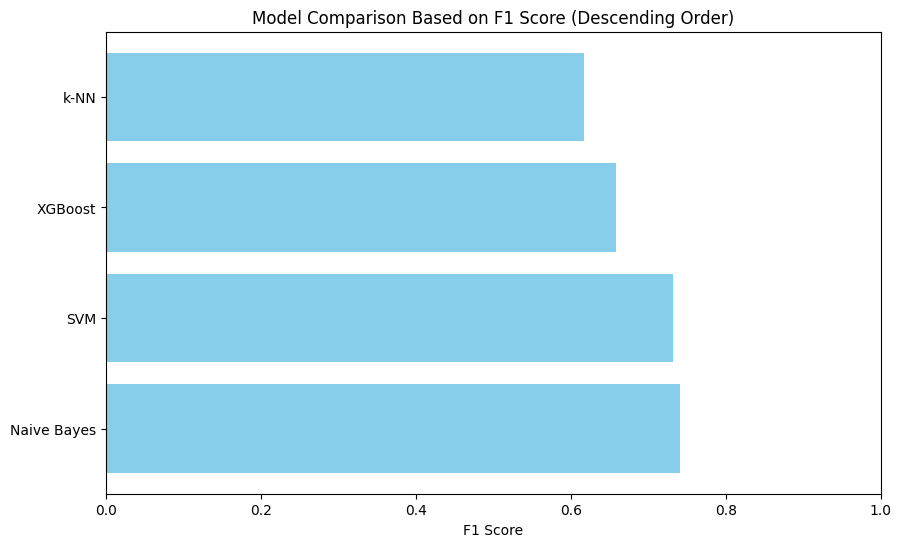

Naive Bayes: 0.7410
SVM: 0.7315
XGBoost: 0.6579
k-NN: 0.6166


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np

# Define the models and their predictions (use your actual predictions here)
models = [

    'Naive Bayes',
    'SVM',
    'k-NN',
    'XGBoost'
]

# Assuming these are your model predictions
# Replace with actual predictions from your models (e.g., `dt_predict`, `nb_predict`, etc.)
predictions = {

    'Naive Bayes': NB_bow_predict,
    'SVM': SVM_bow_predict,
    'k-NN': kNN_bow_predict,
    'XGBoost': xgb_bow_predict,

}

# True labels for comparison (your test data labels)
true_labels = test_sentiments

# Initialize a list to store the F1 scores
f1_scores = []

# Calculate the F1 score for each model and append to the list
for model in models:
    f1 = f1_score(true_labels, predictions[model], average='weighted')  # Use 'weighted' for class imbalance
    f1_scores.append((model, f1))  # Store tuple of (model, f1 score)

# Sort the F1 scores in descending order
f1_scores_sorted = sorted(f1_scores, key=lambda x: x[1], reverse=True)

# Separate the sorted models and their corresponding F1 scores
sorted_models = [x[0] for x in f1_scores_sorted]
sorted_f1_scores = [x[1] for x in f1_scores_sorted]

# Create a bar plot to compare F1 scores in descending order
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('Model Comparison Based on F1 Score (Descending Order)')
plt.xlim(0, 1)  # F1 score ranges from 0 to 1
plt.show()

# Print the F1 scores for each model in descending order
for model, f1 in zip(sorted_models, sorted_f1_scores):
    print(f'{model}: {f1:.4f}')


# **BERT**

In [ ]:
!pip install tensorflow==2.15.1
!pip install tensorflow-text==2.15.0
!pip install tf-models-official==2.15
!pip install transformers==4.24.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import os
import shutil
!pip install numba
!pip install tf-models-official
!pip install transformers
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

#split and take the test set
X, X_test, y, y_test = (train_test_split(reviews['Review'], reviews['Sentiment'],
                                                     stratify=reviews['Sentiment'],
                                                     test_size=0.2,
                                                     train_size=0.8
                                                     ))

In [ ]:

#split the train set (X) into train and validation
X_train, X_val, y_train, y_val = (train_test_split(X, y,
                                                     stratify=y,
                                                     test_size=0.25,
                                                     train_size=0.75
                                                     ))

In [ ]:
X_train

,Review
303,"I left the theater with a lilt in my step, joy..."
545,Tom Wilkinson's character is a man who is not ...
691,Go rent it.
653,"One of the most boring,pointless movies I have..."
304,Duris has a wholesome appearance and gives a f...
...,...
0,"A very, very, very slow-moving, aimless movie ..."
336,but the movie makes a lot of serious mistakes.
476,Tom Wilkinson broke my heart at the end... and...
351,"John Garfield, Ann revere, Lilli Plmer, Willia..."


In [ ]:
X_val

,Review
171,"It didn't make me scared, horrified, or make m..."
178,This was such an awesome movie that i bought i...
400,Every element of this story was so over the to...
322,It is zillion times away from reality.
286,"This movie contained an all-star cast, and wha..."
...,...
246,"Bela Lugosi was totally extraneous, intoning o..."
650,"As for the killer, don't expect anything origi..."
346,"It's just adorable seeing Mickey playing ""Turk..."
697,Simply beautiful.


In [ ]:
X_test

,Review
229,"The sets are so bad, they wouldn't look out of..."
319,"The script is bad, very bad  it contains both..."
46,"I love Lane, but I've never seen her in a movi..."
17,I'll put this gem up against any movie in term...
369,The CG opening sequence in space looked like i...
...,...
82,"You can't relate with them, hell you barely ca..."
14,"This is a very ""right on case"" movie that deli..."
357,I thought it was bad.
162,This is one of the best movies out there that ...


In [ ]:
#@title Choose a BERT model to fine-tune

#the model has 5 layers (L), 512 hidden size H and 8 attention heads
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
}

map_model_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
reviews['Review'][0]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

In [ ]:
text_test = ["A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  "]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_type_ids', 'input_mask', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [ 101 1037 2200 1010 2200 1010 2200 4030 1011 3048 1010 6614]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.69962275  0.997181   -0.27740934  0.12058338  0.00146753  0.09327662
  0.97592896 -0.6555061  -0.22649388 -0.9812482   0.11488887 -0.98613906]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.7996403  -0.26805767  0.06750281 ... -0.61599034  0.5379336
   0.5652452 ]
 [-1.0167495  -0.48886052 -0.84790146 ... -0.48908848 -0.62842155
   1.6138232 ]
 [-0.9301109  -2.07615    -0.8252904  ... -0.17416397 -0.11494675
   1.4575871 ]
 ...
 [-0.8654517  -0.7191997  -0.885393   ...  0.01976367  0.06633495
   0.7535055 ]
 [-1.1753178  -0.12027074 -0.08765841 ... -0.12994932  0.9902668
   1.0292748 ]
 [-0.7436833  -0.5347066  -0.9242452  ... -0.7720373   0.8246759
   0.01154485]]


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)


In [ ]:
classifier_model = build_classifier_model()

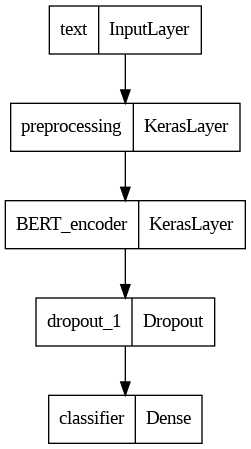

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
epochs = 6
steps_per_epoch = 448  #corresponding to the train set size
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps) #10% of num_train_steps

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
#fine-tune BERT for classification
classifier_model.compile(optimizer,
                     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                     metrics=[tf.keras.metrics.BinaryAccuracy()])
classifier_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

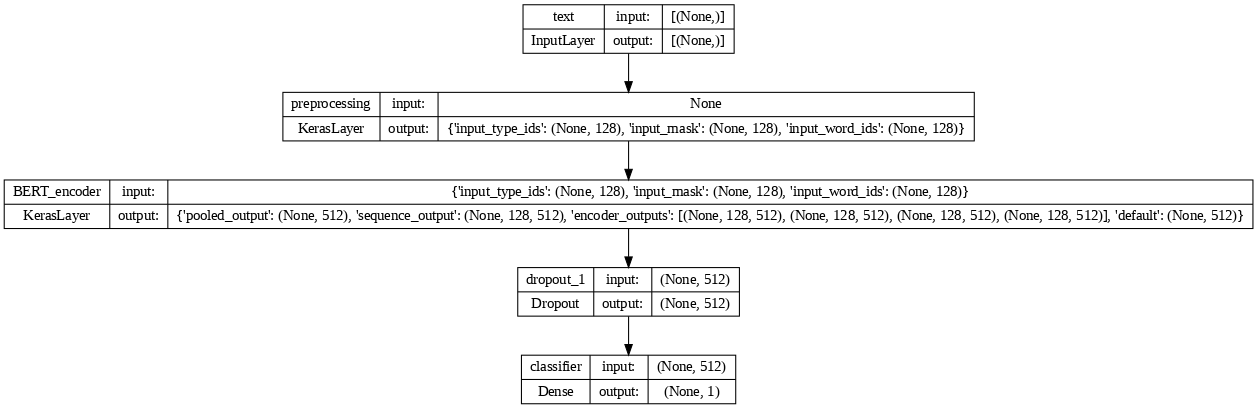

In [ ]:
tf.keras.utils.plot_model(model=classifier_model,show_shapes=True,dpi=76)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(X_train,
                               y_train,
                               validation_data=(X_val, y_val),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/6
14/14 [==============================] - 13s 302ms/step - loss: 0.7451 - binary_accuracy: 0.4732 - val_loss: 0.7049 - val_binary_accuracy: 0.4867
Epoch 2/6
14/14 [==============================] - 4s 259ms/step - loss: 0.7491 - binary_accuracy: 0.4799 - val_loss: 0.6885 - val_binary_accuracy: 0.5200
Epoch 3/6
14/14 [==============================] - 4s 303ms/step - loss: 0.7021 - binary_accuracy: 0.5223 - val_loss: 0.6630 - val_binary_accuracy: 0.5467
Epoch 4/6
14/14 [==============================] - 3s 242ms/step - loss: 0.6629 - binary_accuracy: 0.5580 - val_loss: 0.6333 - val_binary_accuracy: 0.5667
Epoch 5/6
14/14 [==============================] - 4s 255ms/step - loss: 0.6207 - binary_accuracy: 0.5915 - val_loss: 0.5987 - val_binary_accuracy: 0.6067
Epoch 6/6
14/14 [==============================] - 4s 321ms/step - loss: 0.5729 - binary_accuracy: 0.6987 - val_loss: 0.5563 - val_b

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


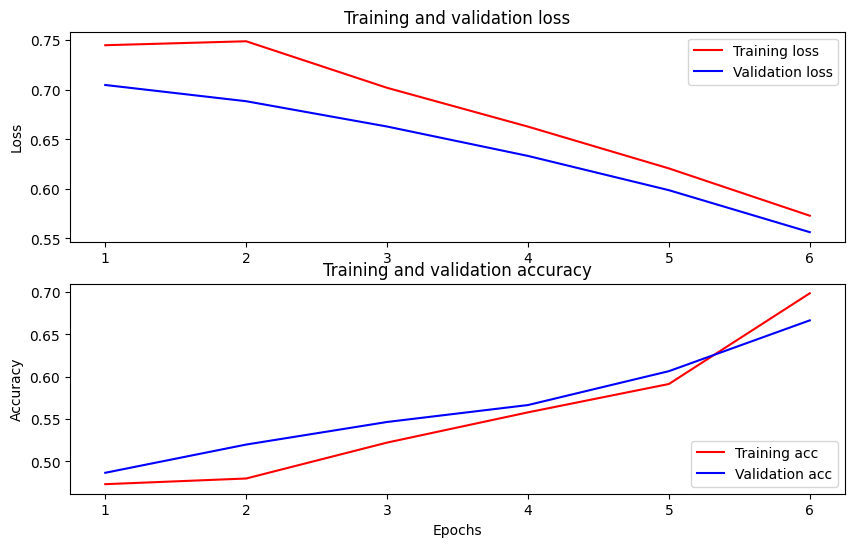

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

5/5 [==============================] - 1s 158ms/step - loss: 0.5649 - binary_accuracy: 0.6933
Loss: 0.5649124383926392
Accuracy: 0.6933333277702332


In [ ]:
#performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#predicted values using the model
y_pred=classifier_model.predict(X_test)

print(y_pred.flatten())

5/5 [==============================] - 1s 104ms/step
[-4.8922515e-01  1.4641045e-01  7.2410583e-01  5.0030929e-01
 -5.4743296e-01  8.2383156e-01  1.2437446e-02 -1.7680754e-01
  6.3670486e-01  2.5525609e-01  1.1813389e+00  1.8449602e-01
 -5.2177513e-01 -8.4599209e-01 -4.9799591e-01  6.5661693e-01
 -4.4011018e-01  1.9565901e-01 -1.6906728e+00 -6.1046276e-02
 -8.7019455e-01 -8.7328351e-01  5.1589698e-01  1.2986551e-01
  8.5366690e-01  1.2485718e-01  7.0065290e-01 -1.0657926e+00
  9.8517555e-01 -7.2954381e-01  1.1435682e+00 -5.1294023e-01
  6.1731905e-01 -1.1859448e+00 -7.8898534e-02  1.0560220e+00
 -1.4078411e-02  4.8205701e-01 -6.2196815e-01  9.9126852e-01
 -9.3896800e-01  2.0258961e+00  8.7370917e-02  1.9541038e+00
 -1.0687432e+00  6.1350679e-01  4.3222919e-01 -6.0288924e-01
 -6.1617690e-01 -2.8898585e-01 -1.8713668e-01  4.9663392e-01
  1.7596704e+00 -1.3080859e-01  5.1739168e-01 -6.9943833e-01
  9.6152496e-01 -1.9631922e-01  8.3354533e-01 -2.1959820e-01
  6.6625297e-02 -1.6278910e-02 -

In [ ]:
#len(y_pred)

for i in range(len(y_pred)):
  if y_pred[i]<0.5:
    y_pred[i] = 0
  else: y_pred[i] = 1

print(y_pred.flatten())

[0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0.]


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_test, y_pred), '\n')
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

[[66  7]
 [39 38]] 

              precision    recall  f1-score   support

           0       0.63      0.90      0.74        73
           1       0.84      0.49      0.62        77

    accuracy                           0.69       150
   macro avg       0.74      0.70      0.68       150
weighted avg       0.74      0.69      0.68       150

Accuracy: 0.6933333333333334
AUC: 0.6988080412737947


# **Topic detection**

In [ ]:
data = reviewsP.Review.values.tolist()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['slowmoving aimless movie distressed drift young man',
 'sure lose flat character audience nearly half walk',
 'attempt artiness black white clever camera angle movie disappointed become even ridiculous act poor plot line almost nonexistent',
 'little music anything speak',
 'best scene movie gerardo try find song keep run head',
 'rest movie lack art charm meaning emptiness work guess empty',
 'waste two hour',
 'saw movie today thought good effort good message kid',
 'bit predictable',
 'love cast jimmy buffet science teacher',
 'baby owl adorable',
 'movie show lot florida best make look appeal',
 'song best muppets hilarious',
 'cool',
 'right case movie delivers everything almost right face',
 'average act main person low budget clearly see',
 'review long overdue since consider tale two sister single great film ever make',
 'ill put gem movie term screenplay cinematography act postproduction edit direct aspect filmmaking',
 'practically perfect true masterpiece sea faux masterpi

In [ ]:
!pip install gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))

words = list(sent_to_words(data))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(words[:1][0][:30])

['slowmoving', 'aimless', 'movie', 'distressed', 'drift', 'young', 'man']


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(words)

# Create Corpus
texts = words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.024*"movie" + 0.020*"film" + 0.014*"see" + 0.010*"one" + 0.010*"bad" + '
  '0.008*"time" + 0.006*"even" + 0.005*"play" + 0.005*"say" + 0.004*"work"'),
 (1,
  '0.021*"film" + 0.014*"movie" + 0.012*"bad" + 0.008*"watch" + 0.006*"even" + '
  '0.006*"really" + 0.006*"didnt" + 0.006*"character" + 0.005*"story" + '
  '0.005*"see"'),
 (2,
  '0.026*"film" + 0.022*"movie" + 0.011*"also" + 0.009*"good" + 0.009*"make" + '
  '0.009*"one" + 0.007*"well" + 0.007*"script" + 0.006*"look" + 0.006*"great"'),
 (3,
  '0.013*"film" + 0.013*"love" + 0.011*"movie" + 0.010*"one" + 0.009*"bad" + '
  '0.008*"good" + 0.008*"really" + 0.007*"see" + 0.007*"watch" + 0.007*"well"'),
 (4,
  '0.027*"film" + 0.015*"movie" + 0.006*"think" + 0.006*"well" + 0.006*"like" '
  '+ 0.006*"good" + 0.005*"character" + 0.005*"give" + 0.005*"dont" + '
  '0.005*"excellent"'),
 (5,
  '0.031*"movie" + 0.017*"bad" + 0.016*"film" + 0.011*"see" + 0.010*"like" + '
  '0.010*"make" + 0.010*"one" + 0.009*"really" + 0.008*"could" +

In [ ]:
pip install pyldavis

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis.gensim_models
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

LDAvis

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.013173 -0.008305       1        1  19.263548
8      0.029444 -0.024169       2        1  17.802324
5      0.058595 -0.016862       3        1  11.873370
3      0.026887  0.023076       4        1   9.329819
7      0.042660  0.074866       5        1   8.604144
2     -0.030811 -0.031962       6        1   8.269230
0      0.024843 -0.022169       7        1   8.028283
1      0.005480 -0.009135       8        1   7.227430
4     -0.092983  0.080041       9        1   5.116777
6     -0.077289 -0.065381      10        1   4.485075, topic_info=      Term        Freq       Total Category  logprob  loglift
98    film  139.000000  139.000000  Default  30.0000  30.0000
296    one   59.000000   59.000000  Default  29.0000  29.0000
129   also   17.000000   17.000000  Default  28.0000  28.0000
15     act   34.000000   34.000000  Default  27.0000  27.0000
69    love   24.000000   24.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
360  thing    1.278049   19.648496  Topic10  -5.5638   0.3717
269   like    1.363426   46.974160  Topic10  -5.4991  -0.4352
456  watch    1.205765   35.576203  Topic10  -5.6220  -0.2801
307   play    1.123993   13.562597  Topic10  -5.6922   0.6140
347  story    1.096782   23.367240  Topic10  -5.7168   0.0455

[745 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
492       2  0.741248  accuse
15        1  0.204523     act
15        2  0.116870     act
15        3  0.087653     act
15        4  0.058435     act
...     ...       ...     ...
401       6  0.061649    year
401       7  0.123298    year
401       8  0.061649    year
398       3  0.690680     yes
2443      3  0.712354   youdo

[1395 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 6, 4, 8, 3, 1, 2, 5, 7])

# NMF

In [ ]:
# Install necessary libraries
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF






In [ ]:
# Step 1: Preprocessing (Tokenization and Vectorization)
tfidf_vectorizer =TfidfVectorizer(max_features=10000)

tfidf = tfidf_vectorizer.fit_transform(data)  # TF-IDF matrix
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()



#get to top n features with the highest tf-idf
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

def get_top_tf_idf_words(tfidf, top_n=10):
    importance = np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[::-1]
    return feature_names[importance[:top_n]]

print([get_top_tf_idf_words(tfidf,10)])





[array(['movie', 'film', 'bad', 'see', 'good', 'one', 'like', 'watch',
       'well', 'make'], dtype=object)]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Set the number of topics you want to extract
n_topics = 10  # You can adjust this number

# Initialize the NMF model
nmf_model = NMF(n_components=n_topics, random_state=42)

# Fit the model to the TF-IDF matrix
nmf_model.fit(tfidf)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NMF(n_components=10, random_state=42)

In [ ]:
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(" ".join(top_words))
        print()

# Print the top words for each topic
print_top_words(nmf_model, tfidf_feature_names)


Topic #1:
movie stupid make love rate awesome way get great lot

Topic #2:
film great excellent make short saw director look truly christmas

Topic #3:
bad act one even everything thought write series yes badwellits

Topic #4:
see one ever go definitely ive worth show anyone come

Topic #5:
good cast great transfer quite end sad director actor love

Topic #6:
like really look camera hate much funny anyone wonderful think

Topic #7:
recommend nothing highly friend saw confidence anyone definitely sorry cant

Topic #8:
watch go keep easy get predictable omit thing even joy

Topic #9:
well plot character act script give played real write cast

Topic #10:
awful time dont waste even line story one worth look



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Transform the TF-IDF matrix to get document-topic distribution
doc_topics = nmf_model.transform(tfidf)

# Get the topic with the highest weight for each document
top_topics = doc_topics.argmax(axis=1)

# Print the top topic for each document
for i, topic in enumerate(top_topics):
    print(f"Document {i+1} is assigned to topic {topic + 1}")


Document 1 is assigned to topic 1
Document 2 is assigned to topic 9
Document 3 is assigned to topic 9
Document 4 is assigned to topic 2
Document 5 is assigned to topic 1
Document 6 is assigned to topic 1
Document 7 is assigned to topic 10
Document 8 is assigned to topic 5
Document 9 is assigned to topic 8
Document 10 is assigned to topic 5
Document 11 is assigned to topic 4
Document 12 is assigned to topic 1
Document 13 is assigned to topic 9
Document 14 is assigned to topic 9
Document 15 is assigned to topic 1
Document 16 is assigned to topic 4
Document 17 is assigned to topic 2
Document 18 is assigned to topic 9
Document 19 is assigned to topic 9
Document 20 is assigned to topic 2
Document 21 is assigned to topic 1
Document 22 is assigned to topic 1
Document 23 is assigned to topic 2
Document 24 is assigned to topic 10
Document 25 is assigned to topic 9
Document 26 is assigned to topic 9
Document 27 is assigned to topic 9
Document 28 is assigned to topic 9
Document 29 is assigned to 

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyLDAvis


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


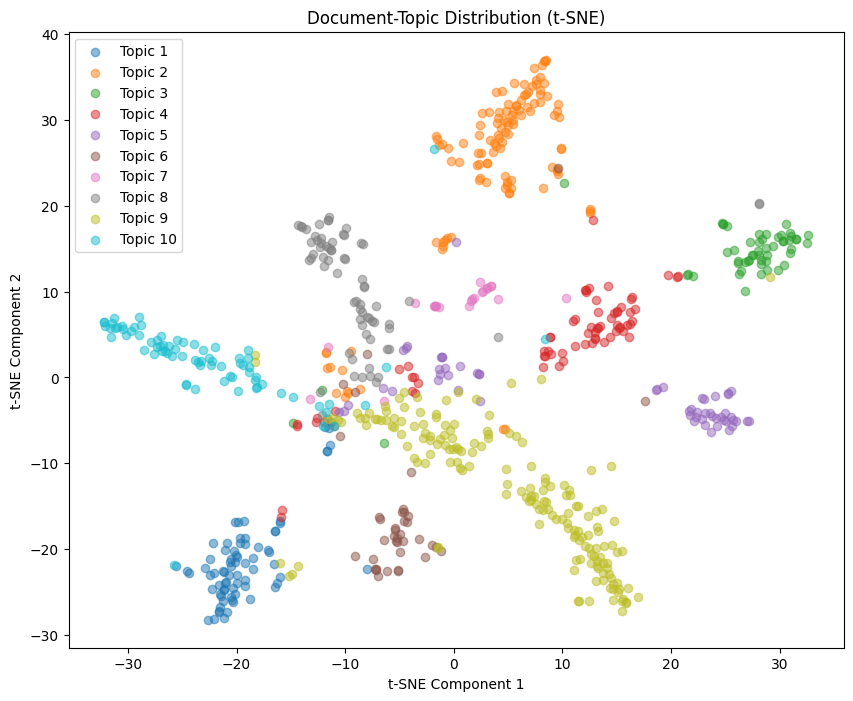

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_document_topics(doc_topics, n_topics=10):
    tsne = TSNE(n_components=2, random_state=42)
    doc_topics_2d = tsne.fit_transform(doc_topics)

    plt.figure(figsize=(10, 8))
    for i in range(n_topics):
        # Get the documents belonging to each topic
        topic_docs = doc_topics.argmax(axis=1) == i
        plt.scatter(doc_topics_2d[topic_docs, 0], doc_topics_2d[topic_docs, 1], label=f"Topic {i+1}", alpha=0.5)

    plt.title("Document-Topic Distribution (t-SNE)")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend()
    plt.show()

# Visualize the document-topic distribution using t-SNE
plot_document_topics(doc_topics)


# DistilBERT

In [ ]:
!pip install transformers datasets torch scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd


# Read the CSV file
df = pd.read_csv("imdb_labelled.csv")  # Replace 'your_file.csv' with the uploaded file name

# Display the first few rows
print(df.head())


                                              Review  Sentiment
0  A very, very, very slow-moving, aimless movie ...          0
1  Not sure who was more lost - the flat characte...          0
2  Attempting artiness with black & white and cle...          0
3       Very little music or anything to speak of.            0
4  The best scene in the movie was when Gerardo i...          1


In [ ]:
from transformers import DistilBertTokenizer

# Initialize the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize the text data
texts = df['Review'].tolist()
labels = df['Sentiment'].tolist()

# Tokenize and encode the dataset
encoded_inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
import torch

# Convert labels to tensor
labels_tensor = torch.tensor(labels)

# Create a dataset
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(encoded_inputs['input_ids'], encoded_inputs['attention_mask'], labels_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


In [ ]:
from transformers import DistilBertForSequenceClassification

# Load DistilBERT with a classification head
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=len(set(labels)))

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
from transformers import AdamW

# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Loss function
loss_fn = torch.nn.CrossEntropyLoss()


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from tqdm import tqdm

# Training loop
epochs = 6

for epoch in range(epochs):
    model.train()
    loop = tqdm(dataloader, leave=True)
    for batch in loop:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update progress bar
        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())


Epoch 5: 100%|██████████| 47/47 [00:33<00:00,  1.42it/s, loss=0.00275]


In [ ]:
from torch.utils.data import random_split, DataLoader

# Assuming `dataset` is your complete dataset
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(val_dataset, batch_size=32)


Epoch 5: 100%|██████████| 19/19 [00:26<00:00,  1.38s/it, loss=0.000497]


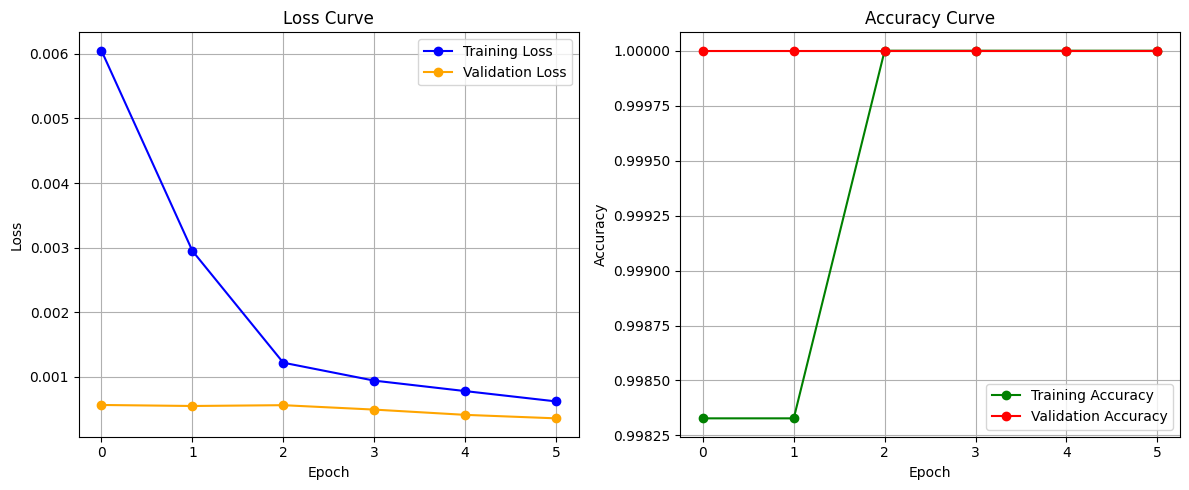

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch

# Initialize storage for loss and accuracy
training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []

# Training loop
epochs = 6

for epoch in range(epochs):
    model.train()
    train_loss = 0
    correct_train = 0
    total_train = 0

    loop = tqdm(train_dataloader, leave=True)
    for batch in loop:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate loss and accuracy
        train_loss += loss.item()
        preds = logits.argmax(dim=-1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

        # Update progress bar
        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())

    # Calculate average training loss and accuracy
    avg_train_loss = train_loss / len(train_dataloader)
    train_acc = correct_train / total_train
    training_loss.append(avg_train_loss)
    training_accuracy.append(train_acc)

    # Validation loop
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for batch in validation_dataloader:  # Use the newly defined validation_dataloader
            input_ids, attention_mask, labels = [x.to(device) for x in batch]

            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            # Accumulate loss and accuracy
            val_loss += loss.item()
            preds = logits.argmax(dim=-1)
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)

    # Calculate average validation loss and accuracy
    avg_val_loss = val_loss / len(validation_dataloader)
    val_acc = correct_val / total_val
    validation_loss.append(avg_val_loss)
    validation_accuracy.append(val_acc)

# Plotting loss and accuracy
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss subplot
axes[0].plot(range(epochs), training_loss, label='Training Loss', marker='o', color='blue')
axes[0].plot(range(epochs), validation_loss, label='Validation Loss', marker='o', color='orange')
axes[0].set_title('Loss Curve')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Accuracy subplot
axes[1].plot(range(epochs), training_accuracy, label='Training Accuracy', marker='o', color='green')
axes[1].plot(range(epochs), validation_accuracy, label='Validation Accuracy', marker='o', color='red')
axes[1].set_title('Accuracy Curve')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your CSV has 'text' and 'label' columns
texts = df['Review'].tolist()
labels = df['Sentiment'].tolist()

# Split into training (80%) and testing (20%)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=0
)


In [ ]:
# Tokenize the test texts
test_encodings = tokenizer(test_texts, padding=True, truncation=True, return_tensors="pt", max_length=512)

# Convert labels to tensor
test_labels_tensor = torch.tensor(test_labels)


In [ ]:
# Move test data to the same device as the model
input_ids = test_encodings["input_ids"].to(device)
attention_mask = test_encodings["attention_mask"].to(device)
test_labels_tensor = test_labels_tensor.to(device)

# Get predictions
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    predictions = torch.argmax(outputs.logits, dim=-1)

# Move predictions back to CPU and convert to numpy
predictions = predictions.cpu().numpy()
test_labels = test_labels_tensor.cpu().numpy()

# Print predictions
print("Predictions:", predictions)

# Compare with ground truth
from sklearn.metrics import classification_report

print(classification_report(test_labels, predictions))


Predictions: [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1
 1 0]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        84
           1       1.00      0.98      0.99        66

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [ ]:
test_texts = [
    "I absolutely loved this movie!",
    "This was the worst experience ever.",

]

# Tokenize and predict
test_encodings = tokenizer(test_texts, padding=True, truncation=True, return_tensors="pt", max_length=512)
input_ids = test_encodings["input_ids"].to(device)
attention_mask = test_encodings["attention_mask"].to(device)

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    predictions = torch.argmax(outputs.logits, dim=-1)

print("Predictions for new inputs:", predictions.cpu().numpy())


Predictions for new inputs: [1 0]
